In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train),(x_test,y_test) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0



x_train.shape
x_test.shape

(10000, 32, 32, 3)

In [7]:
model = Sequential()
from tensorflow.keras.layers import Input
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10,activation = "softmax"))

In [12]:
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics = ["accuracy"]
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(x_train,y_train,
          validation_data=(x_test,y_test),
          epochs=5
         )

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5647 - loss: 1.2220 - val_accuracy: 0.5815 - val_loss: 1.1832
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5891 - loss: 1.1677 - val_accuracy: 0.5514 - val_loss: 1.2854
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6173 - loss: 1.0997 - val_accuracy: 0.5944 - val_loss: 1.1480
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6313 - loss: 1.0550 - val_accuracy: 0.6215 - val_loss: 1.0826
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6521 - loss: 1.0038 - val_accuracy: 0.6423 - val_loss: 1.0152


In [18]:
print("\nEvaluating model on test data....")
test_loss, test_accurancy = model.evaluate(x_test, y_test, verbose= 0)

print(f"\n Test Loss : {test_loss:.4f}")
print(f"Test Accurancy : {test_accurancy*100:.2f}%")



Evaluating model on test data....

 Test Loss : 1.0152
Test Accurancy : 64.23%


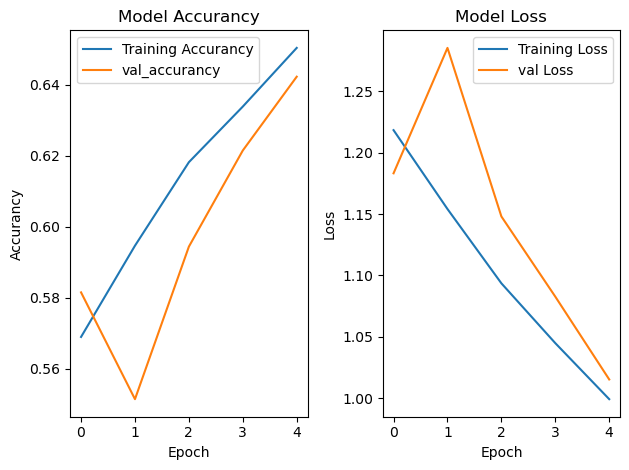

In [19]:
plt.figure(figure=(12,5))
plt.subplot(1,2,1)

plt.plot(history.history['accuracy'],label='Training Accurancy')

plt.plot(history.history['val_accuracy'], label='val_accurancy')

plt.title('Model Accurancy')
plt.xlabel('Epoch')
plt.ylabel('Accurancy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label = 'Training Loss')

plt.plot(history.history['val_loss'],label = 'val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


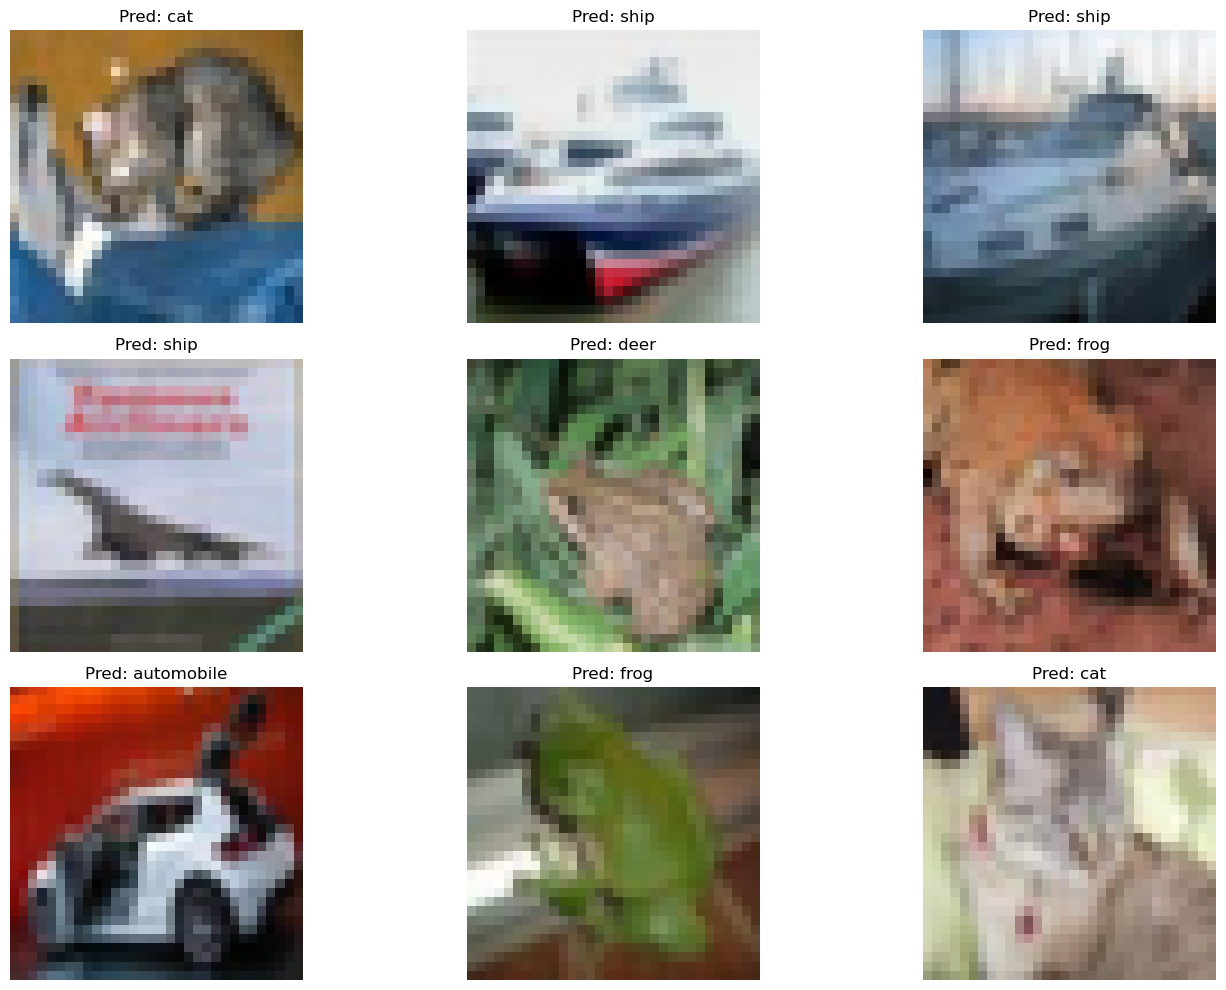

In [29]:
import numpy as np  # Make sure to import numpy
import math
plt.figure(figsize=(15,10))

# Get model predictions
x_predict = model.predict(x_test)

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i])
    
    # --- THIS IS THE CORRECTED PART ---
    
    # Get the predicted class index by finding the highest probability
    pred_index = np.argmax(x_predict[i])
    
    # Get the true class index. This depends on your y_test format
    # CHOOSE ONE of the two options below for 'true_index'
    
    # Option 1: If y_test is one-hot encoded (e.g., [0, 1, 0])
    true_index = np.argmax(y_test[i]) 
    
    # Option 2: If y_test has integer labels (e.g., 2)
    # true_index = y_test[i]
    
    # Set the title using the correct indices
    plt.title(f"Pred: {class_names[pred_index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()